# Cosine Distance (Test for familiarity)

In [60]:
import scipy
from scipy.spatial import distance
import numpy as np

In [61]:
def calculate_diversity(arr2D):
    if(len(arr2D) < 2):
        return 0
    num_actor = len(arr2D)
    nC2 = num_actor*(num_actor-1)/2
    sum = 0
    for idx in range(len(arr2D)):
        for jdx in range(idx+1, len(arr2D)):
            sum += distance.cosine(arr2D[idx], arr2D[jdx])
    return sum/nC2

In [62]:
arr2d = [
    [5,4,0,0,1],
    [4,4,0,0,0],
    [0,0,1,0,0],
    [0,0,0,1,0],
    [1,0,0,0,1]
]

In [63]:
calculate_diversity(arr2d)

0.7863365823230057

# Correlation

In [64]:
from matplotlib import pyplot as plt

In [65]:
np.random.seed(1)
xrr = 20* np.random.randn(1000) + 100
yrr = xrr + (10 * np.random.randn(1000) + 50)

In [66]:
print("xrr mean: {}, std:{}".format(np.mean(xrr), np.std(xrr)))
print("yrr mean: {}, std:{}".format(np.mean(yrr), np.std(yrr)))

xrr mean: 100.77624952319204, std:19.620082678644234
yrr mean: 151.0495039571378, std:22.35798918770594


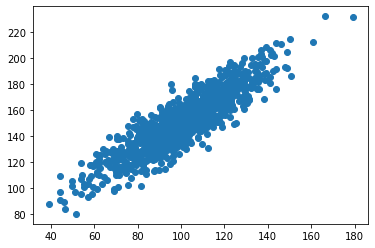

In [67]:
plt.scatter(xrr, yrr)
plt.show()

In [68]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [69]:
pearsonr(xrr, yrr)

(0.8876119085795311, 0.0)

In [70]:
spearmanr(xrr, yrr)

SpearmanrResult(correlation=0.8724050484050484, pvalue=1.58425746359e-312)

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
xxrr = xrr.reshape(xrr.shape[0],1)

In [73]:
model = LinearRegression()
model.fit(xxrr, yrr)

LinearRegression()

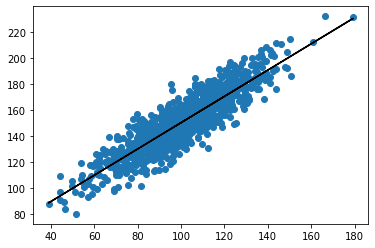

In [76]:
plt.scatter(xrr, yrr)
plt.plot(xrr, model.predict(xxrr),color='k')

In [20]:
model.score(xxrr, yrr)

0.787854900252198

In [22]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [24]:
x = sm.add_constant(xrr)
model = sm.OLS(yrr, x)
results = model.fit()

In [26]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     3706.
Date:                Fri, 21 May 2021   Prob (F-statistic):               0.00
Time:                        19:17:00   Log-Likelihood:                -3750.9
No. Observations:                1000   AIC:                             7506.
Df Residuals:                     998   BIC:                             7516.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.1169      1.706     28.795      0.000      45.770      52.464
x1             1.0115      0.017     60.880      0.000       0.979       1.044
==============================================================================
Omnibus:                        0.995   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.608   Jarque-Bera (JB):                1.030
Skew:                          -0.002   Prob(JB):                        0.598
Kurtosis:                       2.843   Cond. No.                         537.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
print(results.params)
print(results.rsquared)
print(results.bse)
print(results.conf_int(0.05))
# print(wls_prediction_std(results))

[49.11687611  1.01147471]
0.787854900252198
[1.70576787 0.01661434]
[[45.76957303 52.46417919]
 [ 0.97887166  1.04407776]]


In [30]:
intercept, slope = results.params
intercept, slope

(49.11687610670185, 1.0114747108839155)

In [32]:
def fittedFunction(x, slope, intercept):
    return (slope*x) + intercept

In [34]:
# fittedFunction(xrr, slope, intercept)

In [39]:
# fig, ax = plt.subplots(figsize=(8,6))

# ax.plot(xrr, yrr, 'o', label="Data", color='')
# xx = np.linspace(xrr.min(), xrr.max(), 10)
# # ax.plot(xrr, results.fittedvalues, color='black', label="True")

# x_sample = np.linspace(xrr.min(), xrr.max(), 100)

# intercept, slope = results.params


# # ax.plot(x, res2.fittedvalues, 'r--.', label="Predicted")
# ax.plot(xrr, iv_u, 'r--', label="95% prediction band")
# ax.plot(xrr, iv_l, 'r--')

# ax.plot(x_sample, fittedFunction(x_sample, slope, intercept), color='black', label="True")

# legend = ax.legend(loc="best")

In [40]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [41]:
from statsmodels.stats.outliers_influence import summary_table

In [42]:
def plot_regression_line(results):

    st, data, ss2 = summary_table(results, alpha=0.05)

    fittedvalues = data[:, 2]
    predict_mean_se  = data[:, 3]
    predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T
    predict_ci_low, predict_ci_upp = data[:, 6:8].T

    fig = make_subplots()
    fig.add_trace(
        go.Scatter(
            x=xrr, 
            y=yrr, 
            name="Data",
            mode='markers',
            line_color='rgba(153, 153, 255, .6)'
        ),
    )
    fig.add_trace(
        go.Scatter(
            x=xrr, 
            y=fittedvalues, 
            name="regression line",
            # mode='lines',
            # line_color='green'
            line=dict(color='green', width=3)
        ),
    )
    fig.add_trace(
        go.Scatter(
            x=xrr, 
            y=predict_ci_low, 
            name="95% prediction band",
            line=dict(color='rgba(153, 0, 51, .5)', width=1, dash='dot')
        ),
    )
    fig.add_trace(
        go.Scatter(
            x=xrr, 
            y=predict_ci_upp, 
            line=dict(color='rgba(153, 0, 51, .5)', width=1, dash='dot'),
            showlegend=False
        ),
    )

    fig.add_trace(
        go.Scatter(
            x=xrr, 
            y=predict_mean_ci_low, 
            name="95% prediction region",
            mode='lines',
            line=dict(color='rgba(0, 153, 51, .5)', width=1, dash='dot'),
        ),
    )
    fig.add_trace(
        go.Scatter(
            x=xrr, 
            y=predict_mean_ci_upp, 
            line=dict(color='rgba(0, 153, 51, .5)', width=1, dash='dot'),
            showlegend=False
        ),
    )

    fig.update_layout(legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ))
    fig.update_layout(
        height=600, 
        width=800,
    )
    # fig.update_layout(
    #     # margin=dict(l=10, r=10, t=10, b=10),
    #     paper_bgcolor="LightSteelBlue",
    # )
    
    return fig

In [43]:
fig = plot_regression_line(results)
fig.show()

In [44]:
# print(predict_mean_ci_low, predict_mean_ci_upp)

In [46]:
# slopes_95

In [47]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt    
from scipy import stats
import pandas as pd

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [48]:
def predband(x, xd, yd, p, func, conf=0.95):
    # x = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

In [49]:
def f(x, a, b):
    return a * x + b


def draw_prediction(x, y):
    popt, pcov = curve_fit(f, x, y)
    n = len(y)

    # retrieve parameter values
    a = popt[0]
    b = popt[1]
    print('Optimal Values')
    print('a: ' + str(a))
    print('b: ' + str(b))

    # compute r^2
    r2 = 1.0-(sum((y-f(x,a,b))**2)/((n-1.0)*np.var(y,ddof=1)))
    print('R^2: ' + str(r2))

    # calculate parameter confidence interval
    a,b = unc.correlated_values(popt, pcov)
    print('Uncertainty')
    print('slope: ' + str(a))
    print('intercept: ' + str(b))

    # plot data
    plt.scatter(x, y, s=3, label='Data')

    # calculate regression confidence interval
    px = np.linspace(xrr.min(), xrr.max(), 10)
    py = a*px+b
    nom = unp.nominal_values(py)
    std = unp.std_devs(py)


    lpb, upb = predband(px, x, y, popt, f, conf=0.95)

    # plot the regression
    plt.plot(px, nom, c='black', label='y=a x + b')

    # uncertainty lines (95% confidence)
    plt.plot(px, nom - 1.96 * std, c='orange',\
            label='95% Confidence Region')
    plt.plot(px, nom + 1.96 * std, c='orange')
    # prediction band (95% confidence)
    plt.plot(px, lpb, 'k--',label='95% Prediction Band')
    plt.plot(px, upb, 'k--')
    plt.ylabel('y')
    plt.xlabel('x')
    plt.legend(loc='best')
    plt.show()

(1000,) (1000,)
Optimal Values
a: 1.011474710716788
b: 49.116876123076494
R^2: 0.7878549002521977
Uncertainty
slope: 1.011+/-0.017
intercept: 49.1+/-1.7


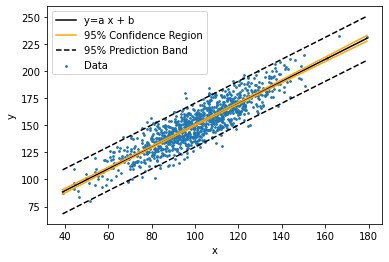

In [50]:
x = xrr
y = yrr
print(x.shape, y.shape)
draw_prediction(x, y)

# Check IMDbPy Library

In [13]:
import imdb
import json

In [2]:
ia = imdb.IMDb()

In [21]:
person = ia.get_person('0000375')
person

<Person id:0000375[http] name:_Robert Downey Jr._>

In [22]:
keys = ia.get_person_infoset()
keys

['awards',
 'biography',
 'filmography',
 'genres links',
 'keywords links',
 'main',
 'news',
 'official sites',
 'other works',
 'publicity']

In [23]:
data = {}
for key in keys:
    try:
        data[key] = person[key]
    except:
        pass

In [15]:
with open("check.json", 'w') as f:
    json.dump(data, f)

TypeError: Object of type Movie is not JSON serializable

In [25]:
for key in data:
    print(key)

biography
filmography


In [51]:
# data['filmography']

# Curve Fitting 

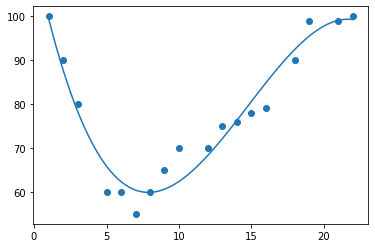

In [58]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [59]:
from sklearn.metrics import r2_score
print(r2_score(y, mymodel(x)))

0.9432150416451027
